# Reading file using Function
***Insurance data

In [1]:
#READING A FILE---without function

import pandas as pd

path="https://raw.githubusercontent.com/rktrojan/DataSciencePython/main/DataFiles/insurance.csv"

pd.read_csv(path).head(5)


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [2]:
#with function

import pandas as pd
#ins=0    #global variable
    
def load_data(path):
    
    ins = pd.read_csv(path)    #local variable
    
    print("ins --  object created")
    return ins   #is to print local veeiable


**Loading the data by calling function:

In [3]:
df=load_data("https://raw.githubusercontent.com/rktrojan/DataSciencePython/main/DataFiles/insurance.csv")
df.head(5)

ins --  object created


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


# Feature Engineering

In [14]:
df.duplicated().sum()

1

In [15]:
duplicated=df[df.duplicated()]

In [4]:
cleaned_df=df.drop_duplicates()
cleaned_df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [18]:
cleaned_df.corr()

,age,bmi,children,expenses
age,1.000000,0.109414,0.041536,0.298308
bmi,0.109414,1.000000,0.012641,0.198637
children,0.041536,0.012641,1.000000,0.067389
expenses,0.298308,0.198637,0.067389,1.000000


# DATA Anlysis Report

In [ ]:
import sweetviz as sz
output=sz.analyse(cleaned_df)

In [ ]:
output.show_html()

# DATA ENCODING

In [5]:

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder


le = LabelEncoder()

In [20]:
le.fit(cleaned_df.region)

le.classes_

array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)

In [22]:
le.transform(cleaned_df.region)

array([3, 2, 2, ..., 2, 3, 1])

In [6]:
cleaned_df["sex_enc"] = le.fit_transform(cleaned_df.sex)
cleaned_df["smoker_enc"] = le.fit_transform(cleaned_df.smoker)
cleaned_df["region_enc"] = le.fit_transform(cleaned_df.region)


C:\Users\SHIREE~1\AppData\Local\Temp/ipykernel_6892/2116193327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["sex_enc"] = le.fit_transform(cleaned_df.sex)
C:\Users\SHIREE~1\AppData\Local\Temp/ipykernel_6892/2116193327.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["smoker_enc"] = le.fit_transform(cleaned_df.smoker)
C:\Users\SHIREE~1\AppData\Local\Temp/ipykernel_6892/2116193327.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [7]:
cleaned_df


#To sort individual colummns
#cleaned_df.sort_values("region")

,age,sex,bmi,children,smoker,region,expenses,sex_enc,smoker_enc,region_enc
0,19,female,27.9,0,yes,southwest,16884.92,0,1,3
1,18,male,33.8,1,no,southeast,1725.55,1,0,2
2,28,male,33.0,3,no,southeast,4449.46,1,0,2
3,33,male,22.7,0,no,northwest,21984.47,1,0,1
4,32,male,28.9,0,no,northwest,3866.86,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,1,0,1
1334,18,female,31.9,0,no,northeast,2205.98,0,0,0
1335,18,female,36.9,0,no,southeast,1629.83,0,0,2
1336,21,female,25.8,0,no,southwest,2007.95,0,0,3


In [8]:
encoded_df = cleaned_df.drop(["sex","smoker","region"], axis=1) 

In [9]:
encoded_df   #now all columns in numarical

,age,bmi,children,expenses,sex_enc,smoker_enc,region_enc
0,19,27.9,0,16884.92,0,1,3
1,18,33.8,1,1725.55,1,0,2
2,28,33.0,3,4449.46,1,0,2
3,33,22.7,0,21984.47,1,0,1
4,32,28.9,0,3866.86,1,0,1
...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,1,0,1
1334,18,31.9,0,2205.98,0,0,0
1335,18,36.9,0,1629.83,0,0,2
1336,21,25.8,0,2007.95,0,0,3


# DATA SCALING:

In [ ]:
so, here all the columns should be in same unites like all are in ones position,hundreds.
so, age,bmi, expenses are having tens,thousands place.
#lets converts them by deviding them with their maximum values.

In [12]:
df.age.max()    #64
df.expenses.max()    #63770.43
df.bmi.max()    #53.1


53.1

In [13]:
encoded_df["age_sc"] = encoded_df.age/encoded_df.age.max()
encoded_df["bmi_sc"] = encoded_df.bmi/encoded_df.bmi.max()
encoded_df["expenses_sc"] = encoded_df.expenses/encoded_df.expenses.max()

In [14]:
encoded_df

,age,bmi,children,expenses,sex_enc,smoker_enc,region_enc,age_sc,bmi_sc,expenses_sc
0,19,27.9,0,16884.92,0,1,3,0.296875,0.525424,0.264777
1,18,33.8,1,1725.55,1,0,2,0.281250,0.636535,0.027059
2,28,33.0,3,4449.46,1,0,2,0.437500,0.621469,0.069773
3,33,22.7,0,21984.47,1,0,1,0.515625,0.427495,0.344744
4,32,28.9,0,3866.86,1,0,1,0.500000,0.544256,0.060637
...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,1,0,1,0.781250,0.583804,0.166230
1334,18,31.9,0,2205.98,0,0,0,0.281250,0.600753,0.034593
1335,18,36.9,0,1629.83,0,0,2,0.281250,0.694915,0.025558
1336,21,25.8,0,2007.95,0,0,3,0.328125,0.485876,0.031487


In [15]:
scaled_df = encoded_df.drop(["age","bmi","expenses"],axis=1)


In [16]:
scaled_df    #now, all columns in same units.

,children,sex_enc,smoker_enc,region_enc,age_sc,bmi_sc,expenses_sc
0,0,0,1,3,0.296875,0.525424,0.264777
1,1,1,0,2,0.281250,0.636535,0.027059
2,3,1,0,2,0.437500,0.621469,0.069773
3,0,1,0,1,0.515625,0.427495,0.344744
4,0,1,0,1,0.500000,0.544256,0.060637
...,...,...,...,...,...,...,...
1333,3,1,0,1,0.781250,0.583804,0.166230
1334,0,0,0,0,0.281250,0.600753,0.034593
1335,0,0,0,2,0.281250,0.694915,0.025558
1336,0,0,0,3,0.328125,0.485876,0.031487


# ML

In [22]:
# data split in 2 parts - train and test

from sklearn.model_selection import train_test_split


train, test = train_test_split(scaled_df, test_size=.30, random_state=50)


#x_train,x_test,y_train,y_test = train_test_split(cleaned_df_x,cleaned_df_y,test_size=0.25, random_state=44)


#fix the value of random _state do not change it.





In [23]:
train

,children,sex_enc,smoker_enc,region_enc,age_sc,bmi_sc,expenses_sc
852,0,0,1,0,0.718750,0.668550,0.660363
771,2,0,0,3,0.828125,0.502825,0.174858
33,0,1,0,1,0.984375,0.532957,0.215932
168,1,0,0,1,0.296875,0.598870,0.042642
830,0,1,0,3,0.984375,0.623352,0.210031
...,...,...,...,...,...,...,...
229,2,1,0,0,0.734375,0.480226,0.144664
70,0,0,1,2,0.421875,0.467043,0.259960
132,2,0,0,3,0.828125,0.676083,0.175059
1314,3,0,1,1,0.468750,0.446328,0.294272


In [26]:
train_X = train[["age_sc","bmi_sc","children","sex_enc","smoker_enc","region_enc"]]

train_X

,age_sc,bmi_sc,children,sex_enc,smoker_enc,region_enc
852,0.718750,0.668550,0,0,1,0
771,0.828125,0.502825,2,0,0,3
33,0.984375,0.532957,0,1,0,1
168,0.296875,0.598870,1,0,0,1
830,0.984375,0.623352,0,1,0,3
...,...,...,...,...,...,...
229,0.734375,0.480226,2,1,0,0
70,0.421875,0.467043,0,0,1,2
132,0.828125,0.676083,2,0,0,3
1314,0.468750,0.446328,3,0,1,1


In [27]:
train_Y = train[["expenses_sc"]]
train_Y

,expenses_sc
852,0.660363
771,0.174858
33,0.215932
168,0.042642
830,0.210031
...,...
229,0.144664
70,0.259960
132,0.175059
1314,0.294272


In [28]:
test

,children,sex_enc,smoker_enc,region_enc,age_sc,bmi_sc,expenses_sc
1106,0,0,0,1,0.765625,0.563089,0.140946
1268,0,0,0,3,0.312500,0.627119,0.029488
287,0,0,0,1,0.984375,0.493409,0.223555
232,0,0,0,3,0.296875,0.335217,0.027094
849,0,1,0,1,0.859375,0.617702,0.166247
...,...,...,...,...,...,...,...
806,1,0,0,1,0.625000,0.779661,0.446551
1073,2,0,0,0,0.843750,0.544256,0.189691
339,1,0,0,2,0.718750,0.521657,0.129098
540,3,0,0,3,0.531250,0.715631,0.097168


In [29]:
test_X = test[["age_sc","bmi_sc","children","sex_enc","smoker_enc","region_enc"]]

test_X

,age_sc,bmi_sc,children,sex_enc,smoker_enc,region_enc
1106,0.765625,0.563089,0,0,0,1
1268,0.312500,0.627119,0,0,0,3
287,0.984375,0.493409,0,0,0,1
232,0.296875,0.335217,0,0,0,3
849,0.859375,0.617702,0,1,0,1
...,...,...,...,...,...,...
806,0.625000,0.779661,1,0,0,1
1073,0.843750,0.544256,2,0,0,0
339,0.718750,0.521657,1,0,0,2
540,0.531250,0.715631,3,0,0,3


In [30]:
test_Y = test[["expenses_sc"]]
test_Y

,expenses_sc
1106,0.140946
1268,0.029488
287,0.223555
232,0.027094
849,0.166247
...,...
806,0.446551
1073,0.189691
339,0.129098
540,0.097168


In [35]:
#convering it to dataframe inorder to sort the indexes.
actuals = pd.DataFrame(test_Y)

actuals.reset_index(inplace=True)

actuals.expenses_sc

0      0.140946
1      0.029488
2      0.223555
3      0.027094
4      0.166247
         ...   
397    0.446551
398    0.189691
399    0.129098
400    0.097168
401    0.276980
Name: expenses_sc, Length: 402, dtype: float64

# Model training phase


In [36]:
from sklearn.linear_model import  LinearRegression , Ridge, Lasso, ElasticNet

lr = LinearRegression()


In [37]:
lr.fit(train_X,train_Y)

LinearRegression()

In [ ]:
model trained.

In [38]:
#slopes /weights

lr.coef_

#depicts the importance of the feature.higher value high imp.
#sign does not matter.
#take magnitude.
#+ve sign indicates x inc, Y increases, 
#-ve sign indicates x incres, Y decreases


#test[["age_sc","bmi_sc","children","sex_enc","smoker_enc","region_enc"]]



array([[ 0.25211579,  0.25435146,  0.00634021, -0.00061253,  0.36976471,
        -0.00450141]])

In [39]:
# intercept = depicts the constant value

lr.intercept_

array([-0.1683117])

In [40]:
lr.score(train_X,train_Y)

0.7378099816312533

***we should plot the data with model fitting line

In [48]:
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np


C:\Users\Shireesha myadari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shireesha myadari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_sc', ylabel='expenses_sc'>

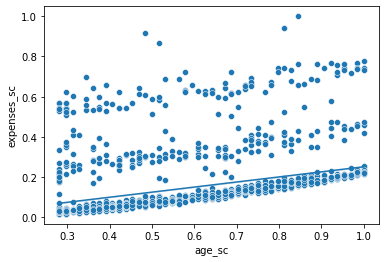

In [50]:
# AGE VS EXPENSES - TRAIN DATA

sb.scatterplot(train.age_sc,train.expenses_sc)

sb.lineplot(train.age_sc,0.25211579*train.age_sc)


***==============================================================================================
# Model testing phase

In [41]:
predicted = lr.predict(test_X)
predicted

array([[ 0.16343542],
       [ 0.05647879],
       [ 0.20086258],
       [-0.02170624],
       [ 0.20034988],
       [ 0.43562052],
       [ 0.21463587],
       [ 0.49453221],
       [ 0.06699965],
       [ 0.58314062],
       [ 0.55012941],
       [ 0.22013816],
       [ 0.11849052],
       [ 0.41852678],
       [ 0.08009047],
       [ 0.24276883],
       [ 0.06172732],
       [ 0.5275029 ],
       [ 0.45059316],
       [ 0.26818561],
       [ 0.15154565],
       [ 0.59516448],
       [ 0.17676536],
       [ 0.17845507],
       [ 0.19324686],
       [ 0.14056067],
       [ 0.18805726],
       [ 0.09440521],
       [ 0.25186835],
       [ 0.09036999],
       [ 0.2054697 ],
       [ 0.12934143],
       [ 0.07705181],
       [ 0.20755259],
       [ 0.15175587],
       [ 0.46549771],
       [ 0.5611251 ],
       [ 0.18408842],
       [ 0.17858809],
       [ 0.11496178],
       [ 0.11355505],
       [ 0.20680964],
       [ 0.0838308 ],
       [ 0.11024398],
       [ 0.59499107],
       [ 0

In [42]:
predictions = pd.DataFrame(predicted, columns=["expenses_sc"])

predictions

,expenses_sc
0,0.163435
1,0.056479
2,0.200863
3,-0.021706
4,0.200350
...,...
397,0.189407
398,0.195524
399,0.142918
400,0.153163


# error = actual-predicted

In [43]:
error=test_Y - predicted
error

,level_0,index,expenses_sc
0,-0.163435,1105.836565,-0.022490
1,0.943521,1267.943521,-0.026990
2,1.799137,286.799137,0.022692
3,3.021706,232.021706,0.048800
4,3.799650,848.799650,-0.034103
...,...,...,...
397,396.810593,805.810593,0.257143
398,397.804476,1072.804476,-0.005833
399,398.857082,338.857082,-0.013820
400,399.846837,539.846837,-0.055995


In [44]:
#error analysis

actuals.expenses_sc - predictions.expenses_sc


0     -0.022490
1     -0.026990
2      0.022692
3      0.048800
4     -0.034103
         ...   
397    0.257143
398   -0.005833
399   -0.013820
400   -0.055995
401   -0.159140
Name: expenses_sc, Length: 402, dtype: float64

In [45]:
#ACTUAL vs PREDICTED values

pd.concat([pd.DataFrame(actuals["expenses_sc"]),predictions], axis=1)

,expenses_sc,expenses_sc
0,0.140946,0.163435
1,0.029488,0.056479
2,0.223555,0.200863
3,0.027094,-0.021706
4,0.166247,0.200350
...,...,...
397,0.446551,0.189407
398,0.189691,0.195524
399,0.129098,0.142918
400,0.097168,0.153163


## Test measurements

### error analysis

In [46]:
from sklearn.metrics 
import 
mean_absolute_error,
mean_absolute_percentage_error,
mean_squared_error


In [47]:
#MSE

mse= mean_squared_error(actuals.expenses_sc, predictions.expenses_sc)


#RMSE

import math

rmse=math.sqrt(mse)

print(mse,"  ,  ",rmse)

0.00819816598784671   ,   0.09054372417703344


# Accuracy Analysis

In [ ]:
from sklearn.metrics import accuracy_score, r2_score



# lr.score(train_X,train_Y)



#print(accuracy_score(actuals.expenses, predictions.expenses))

print(r2_score(actuals.expenses, predictions.expenses))

#test accuracy

# ADDITIONAL STUDY

FEATURE SELECTION


In [51]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

#??SequentialFeatureSelector
it is a module, means it intenally contains sime folders as classes and files

In [59]:
sfs1 = sfs(lr, k_features=4, forward=True, verbose=1, scoring='neg_mean_squared_error')


#k=no. of features, pic in forward direction
#verbose=no. of threds /cpu that have in out machine/laptop.

#scoring can have values like neg_mean_squared_error, mean_squared_error or r2

In [60]:
sfs1.fit(train_X,train_Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s finished

[2022-07-16 21:37:46] Features: 1/4 -- score: -0.014019002852286433[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2022-07-16 21:37:46] Features: 2/4 -- score: -0.010496904831091006[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

SequentialFeatureSelector(estimator=LinearRegression(), k_features=4,
                          scoring='neg_mean_squared_error', verbose=4)

In [61]:
feat_names = list(sfs1.k_feature_names_)

print("Here is the list of top 4 features -- ", feat_names)



Here is the list of top 4 features --  ['age_sc', 'bmi_sc', 'children', 'smoker_enc']
